# Part 2: Read and visualize raster data

## Introduction

* We consider optical satellite images from the [Sentinel-2 mission](https://sentinel.esa.int/web/sentinel/missions/sentinel-2), part of the European Union's [Copernicus](https://www.copernicus.eu/en) space programme. 
* We use `rioxarray`, which combines the functionalities of the `rasterio` package to work with rasters and `xarray` to handle multi-dimensional arrays. 
* We open a raster file as a `DataArray` and explore the attributes and methods of this object.

In [ ]:
# If on Colab: uncomment and execute the following line
# ! pip install pyproj rioxarray

## Load a raster

We open a raster file using `rioxarray` (library documentation [here](https://corteva.github.io/rioxarray/stable/readme.html)):

In [1]:
# path to the raster file (band 9, water vapour)
raster_path = '../data/S2A_31UFU_20200328_0_L2A_B09.tif'

In [2]:
import rioxarray

In [3]:
raster = rioxarray.open_rasterio(raster_path)

In [4]:
raster

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [5]:
raster.values

array([[[    0,     0,     0, ...,  8888,  9075,  8139],
        [    0,     0,     0, ..., 10444, 10358,  8669],
        [    0,     0,     0, ..., 10346, 10659,  9168],
        ...,
        [    0,     0,     0, ...,  4295,  4289,  4320],
        [    0,     0,     0, ...,  4291,  4269,  4179],
        [    0,     0,     0, ...,  3944,  3503,  3862]]], dtype=uint16)

In [6]:
raster

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
array([[[    0,     0, ...,  9075,  8139],
        [    0,     0, ..., 10358,  8669],
        ...,
        [    0,     0, ...,  4269,  4179],
        [    0,     0, ...,  3503,  3862]]], dtype=uint16)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

## Visualize a raster

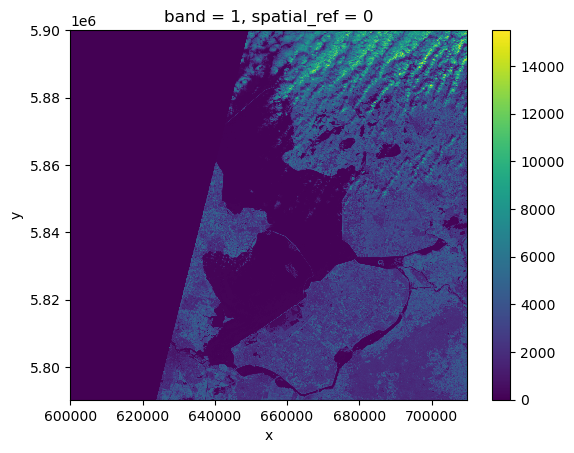

In [7]:
raster.plot()

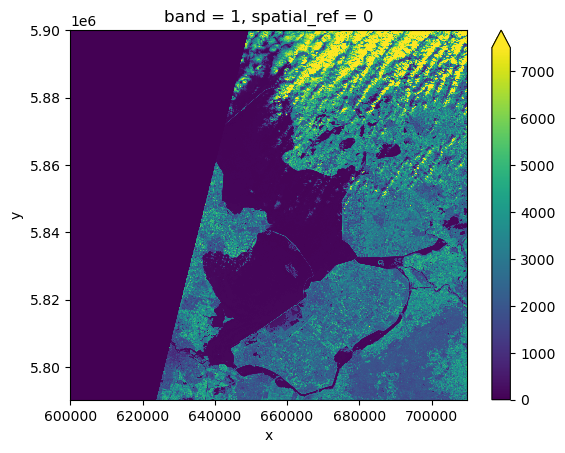

In [8]:
raster.plot(robust=True)

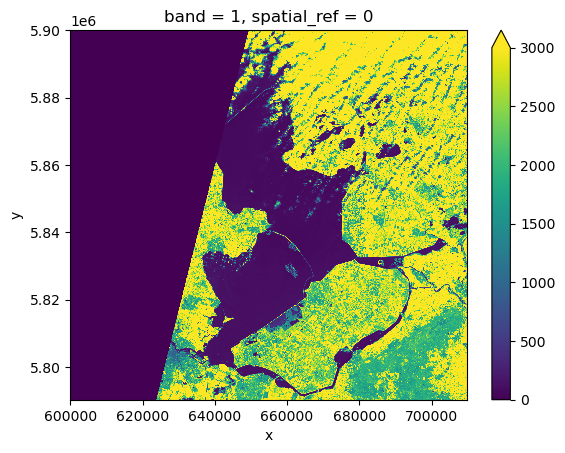

In [9]:
raster.plot(vmin=0, vmax=3000)

## Missing data

In [10]:
raster.rio.nodata

0

In [11]:
raster_nodata = rioxarray.open_rasterio(raster_path, masked=True)

In [12]:
raster_nodata

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [13]:
raster_nodata.values

array([[[   nan,    nan,    nan, ...,  8888.,  9075.,  8139.],
        [   nan,    nan,    nan, ..., 10444., 10358.,  8669.],
        [   nan,    nan,    nan, ..., 10346., 10659.,  9168.],
        ...,
        [   nan,    nan,    nan, ...,  4295.,  4289.,  4320.],
        [   nan,    nan,    nan, ...,  4291.,  4269.,  4179.],
        [   nan,    nan,    nan, ...,  3944.,  3503.,  3862.]]],
      dtype=float32)

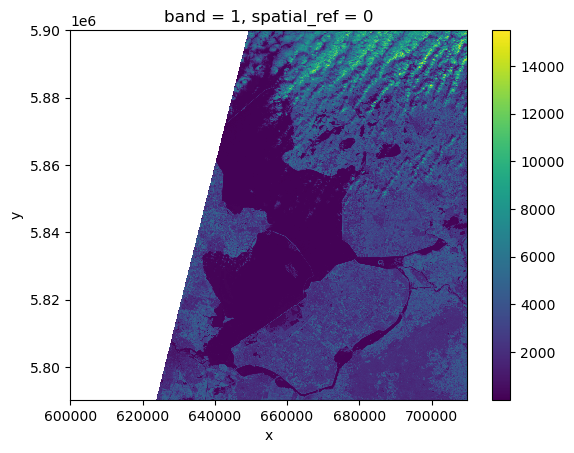

In [14]:
raster_nodata.plot()

In [16]:
raster

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
array([[[    0,     0, ...,  9075,  8139],
        [    0,     0, ..., 10358,  8669],
        ...,
        [    0,     0, ...,  4269,  4179],
        [    0,     0, ...,  3503,  3862]]], dtype=uint16)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [17]:
raster == raster.rio.nodata

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
array([[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0

In [15]:
raster_nodata

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
array([[[   nan,    nan, ...,  9075.,  8139.],
        [   nan,    nan, ..., 10358.,  8669.],
        ...,
        [   nan,    nan, ...,  4269.,  4179.],
        [   nan,    nan, ...,  3503.,  3862.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

## Coordinate Reference System (CRS) in Python

For more information about the CRS (e.g. its area of use), we use `pyproj` (documentaion [here](https://pyproj4.github.io/pyproj/stable/)).

In [18]:
raster.rio.crs

CRS.from_epsg(32631)

In [19]:
import pyproj

In [20]:
pyproj.CRS(raster.rio.crs)

<Derived Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
raster_reproj = raster_nodata.rio.reproject(4326)

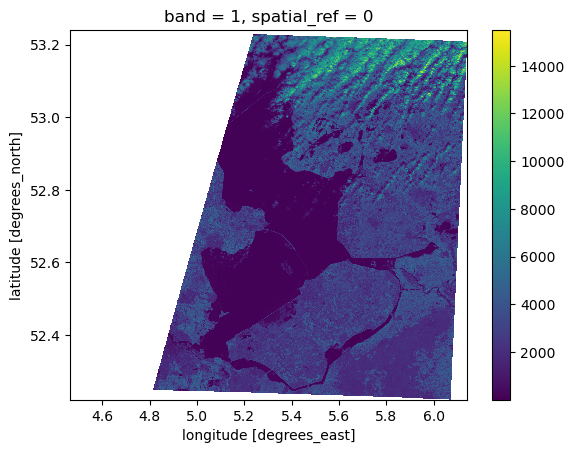

In [23]:
raster_reproj.plot()

In [25]:
raster_crs= raster.rio.write_crs(4326)

In [26]:
raster_crs.rio.crs

CRS.from_epsg(4326)

In [28]:
raster_nodata.coords["x"]

<xarray.DataArray 'x' (x: 1830)>
array([600030., 600090., 600150., ..., 709650., 709710., 709770.])
Coordinates:
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
    spatial_ref  int64 0

## Calculate raster statistics

In [30]:
raster_nodata.min()

<xarray.DataArray ()>
array(8., dtype=float32)
Coordinates:
    spatial_ref  int64 0

In [32]:
raster_nodata.mean(dim="x")

<xarray.DataArray (band: 1, y: 1830)>
array([[5494.3706, 6298.003 , 6399.827 , ..., 2666.8953, 2605.9707,
        2545.6743]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0

## Multi-band rasters

An example of multi-band raster is the true color image: a raster where the red, green and blue (RGB) channels are stored as three layers ("bands").

In [33]:
# path to the multi-band raster file (true color image)
raster_path = '../data/S2B_31UFU_20200326_0_L2A_TCI_small.tif'

In [34]:
raster_multiband = rioxarray.open_rasterio(raster_path)

In [35]:
raster_multiband

<xarray.DataArray (band: 3, y: 1640, x: 1640)>
[8068800 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6.266e+05 6.266e+05 6.266e+05 ... 6.43e+05 6.43e+05
  * y            (y) float64 5.818e+06 5.818e+06 ... 5.802e+06 5.802e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

(array([ 173653., 2771814., 3930082.,  893447.,  146487.,   54623.,
          30030.,   19586.,   17717.,   31361.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

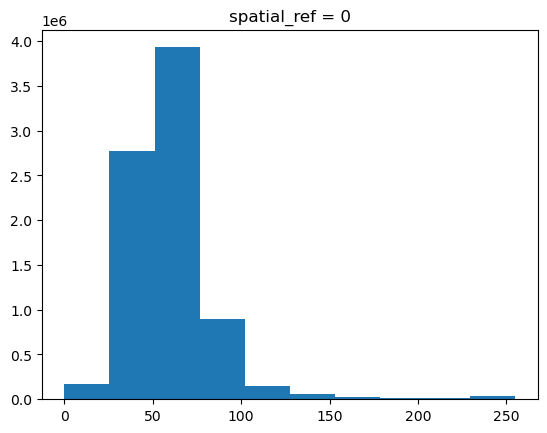

In [36]:
raster_multiband.plot()

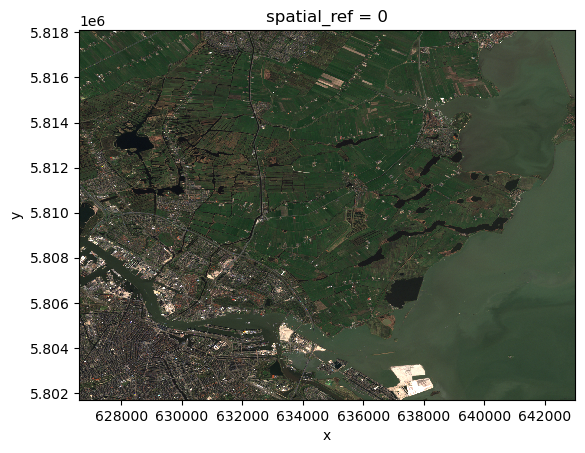

In [37]:
raster_multiband.plot.imshow()

In [38]:
raster.isel(band=0)

<xarray.DataArray (y: 1830, x: 1830)>
array([[    0,     0,     0, ...,  8888,  9075,  8139],
       [    0,     0,     0, ..., 10444, 10358,  8669],
       [    0,     0,     0, ..., 10346, 10659,  9168],
       ...,
       [    0,     0,     0, ...,  4295,  4289,  4320],
       [    0,     0,     0, ...,  4291,  4269,  4179],
       [    0,     0,     0, ...,  3944,  3503,  3862]], dtype=uint16)
Coordinates:
    band         int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [39]:
raster_multiband.sel(band=1)

<xarray.DataArray (y: 1640, x: 1640)>
[2689600 values with dtype=uint8]
Coordinates:
    band         int64 1
  * x            (x) float64 6.266e+05 6.266e+05 6.266e+05 ... 6.43e+05 6.43e+05
  * y            (y) float64 5.818e+06 5.818e+06 ... 5.802e+06 5.802e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0